In [ ]:
# Import all necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-354b1646dff3>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


# New section

In [ ]:
#Dataset Loading

In [ ]:
data_df=pd.read_csv('/content/default of credit card clients.xls - Data(3) (1).csv')

In [ ]:
#Data Set first View

In [ ]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Data Desciption:
''''What we know about dataset :

We have records of 30000 customers. Below are the description of all features we have.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)'''


"'What we know about dataset :\n\nWe have records of 30000 customers. Below are the description of all features we have.\n\nID: ID of each client\n\nLIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)\n\nSEX: Gender (1 = male, 2 = female)\n\nEDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)\n\nMARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)\n\nAGE: Age in years\n\nScale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)\n\nPAY_0: Repayment status in September, 2005 (scale same as above)\n\nPAY_2: Repayment status in August, 2005 (scale same as above)\n\nPAY_3: Repayment status in July, 2005 (scale same as above)\n\nPAY_4: Repayment status in June, 2005 (scale same as a

In [ ]:
#Import data frame from drive as Df
df=pd.read_csv

In [ ]:
# data set row and columns count
data_df.shape

(30000, 25)

In [ ]:
# Check data info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#Data Description
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:

#check for any duplicates
len(data_df[data_df.duplicated()])

0

In [ ]:

#hence no duplicates available

In [ ]:
#columns of dataset
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Taking the sum of null values in columns from a dataset
data_df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0


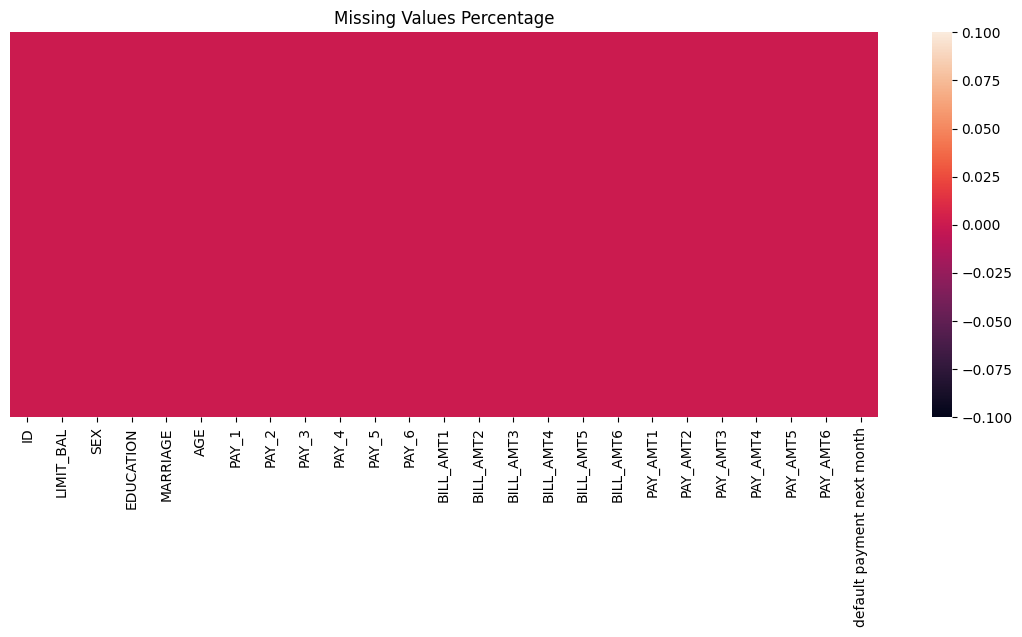

In [ ]:
#Plot to check null values
plt.figure(figsize=(14,5))
sns.heatmap(data_df.isnull(), cbar=True, yticklabels=False )
plt.title("Missing Values Percentage")
plt.show()

In [ ]:
#Dataset dose not contains any NA values, null values and duplicates.

In [ ]:

#Data Processing

In [ ]:
#renaming of columns
data_df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
data_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [ ]:
#check for rename
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:

#replacing values with labels
#replacing values with there labels
data_df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
data_df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
data_df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
data_df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [ ]:
#checking for replaced labels
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


In [ ]:
#EDA (Exploratory Data Analysis)
#Dependent Variable:
#Is Defaulte


In [ ]:
#Value counts of Isdefaulter
data_df['IsDefaulter'].value_counts()

,count
IsDefaulter,
No,23364
Yes,6636


<Axes: xlabel='IsDefaulter', ylabel='count'>

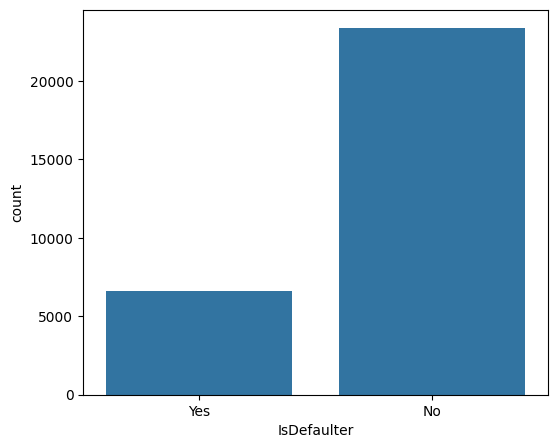

In [ ]:
#value count plot for IsDefaulter
plt.figure(figsize=(6,5))
sns.countplot(x = 'IsDefaulter', data = data_df)


In [ ]:
#Independent Variable
#Categorical Features
#We have few categorical features in our dataset. Let'Check how they are related with out target class.

#Sex

In [ ]:
print(data_df.columns)
data_df['SEX'].value_counts()


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')


,count
SEX,
Female,18112
Male,11888


<Axes: xlabel='SEX', ylabel='count'>

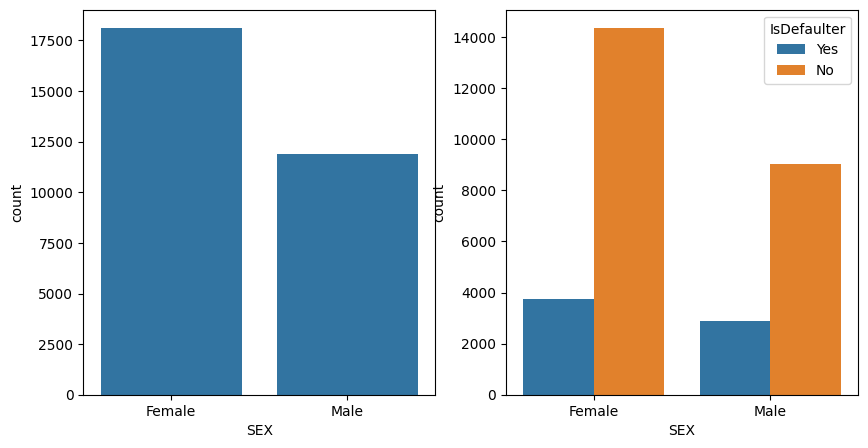

In [ ]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = data_df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = data_df)

In [ ]:
#Education
#As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [ ]:

fil = (data_df['EDUCATION'] == 0) | (data_df['EDUCATION'] == 5) | (data_df['EDUCATION'] == 6) | (data_df['EDUCATION'] == 4)
data_df.loc[fil, 'EDUCATION'] = 'Others'

In [ ]:
#Value counts for education category
data_df['EDUCATION'].value_counts()

,count
EDUCATION,
University,14030
Graduate School,10585
High School,4917
Others,468


<Axes: xlabel='EDUCATION', ylabel='count'>

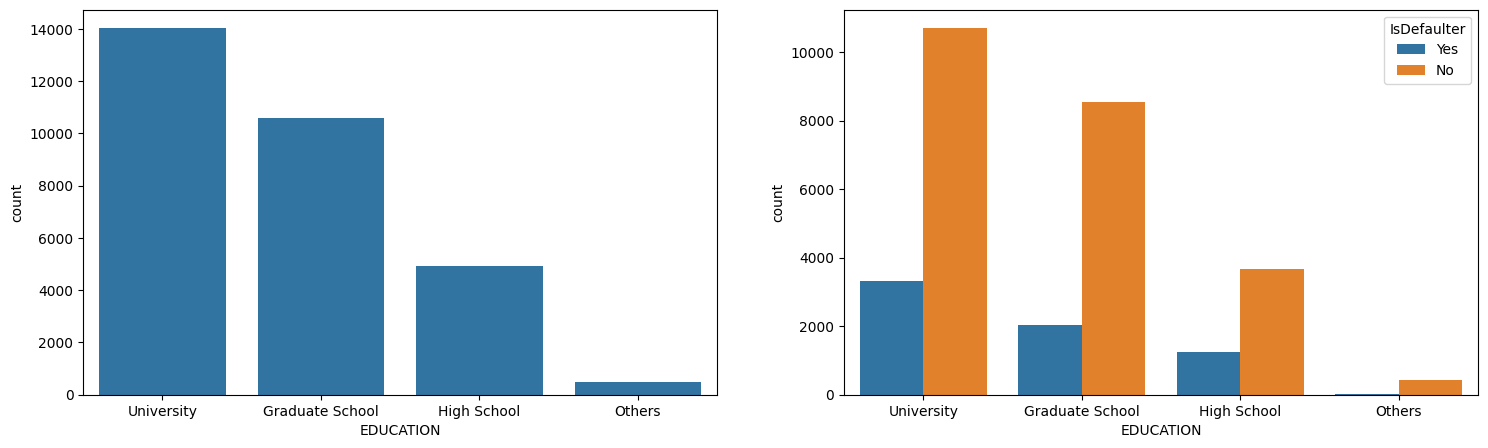

In [ ]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = data_df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = data_df)

In [ ]:
#Marriage

In [ ]:
#Value counts for marriage category
fil = data_df['MARRIAGE']==0
data_df.loc[fil,'MARRIAGE'] = 'Others'
data_df['MARRIAGE'].value_counts()

,count
MARRIAGE,
Single,15964
Married,13659
Others,377


<Axes: xlabel='MARRIAGE', ylabel='count'>

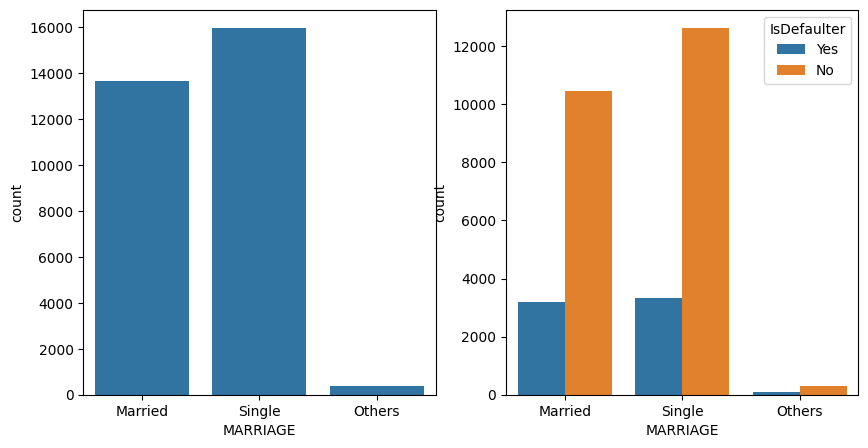

In [ ]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = data_df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = data_df)

In [ ]:
data_df['AGE'].value_counts()

,count
AGE,
29,1605
27,1477
28,1409
30,1395
26,1256
31,1217
25,1186
34,1162
32,1158


In [ ]:
#Age
#Plotting graph of number of ages of all people with credit card irrespective of gender.

In [ ]:
#age wise values of credit card holder
data_df['AGE'].value_counts()

,count
AGE,
29,1605
27,1477
28,1409
30,1395
26,1256
31,1217
25,1186
34,1162
32,1158


<Axes: xlabel='AGE', ylabel='count'>

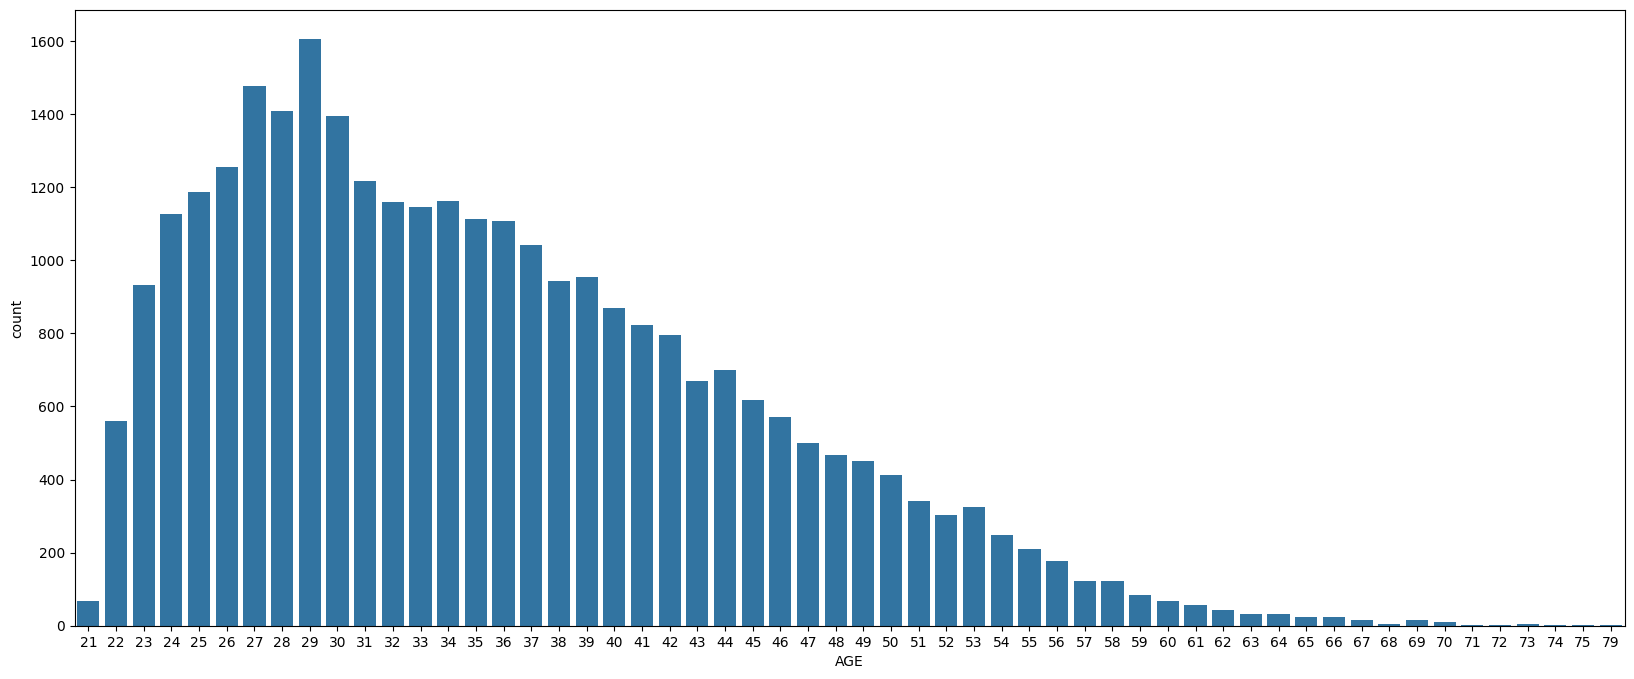

In [ ]:
#values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = data_df)

<Axes: xlabel='AGE', ylabel='count'>

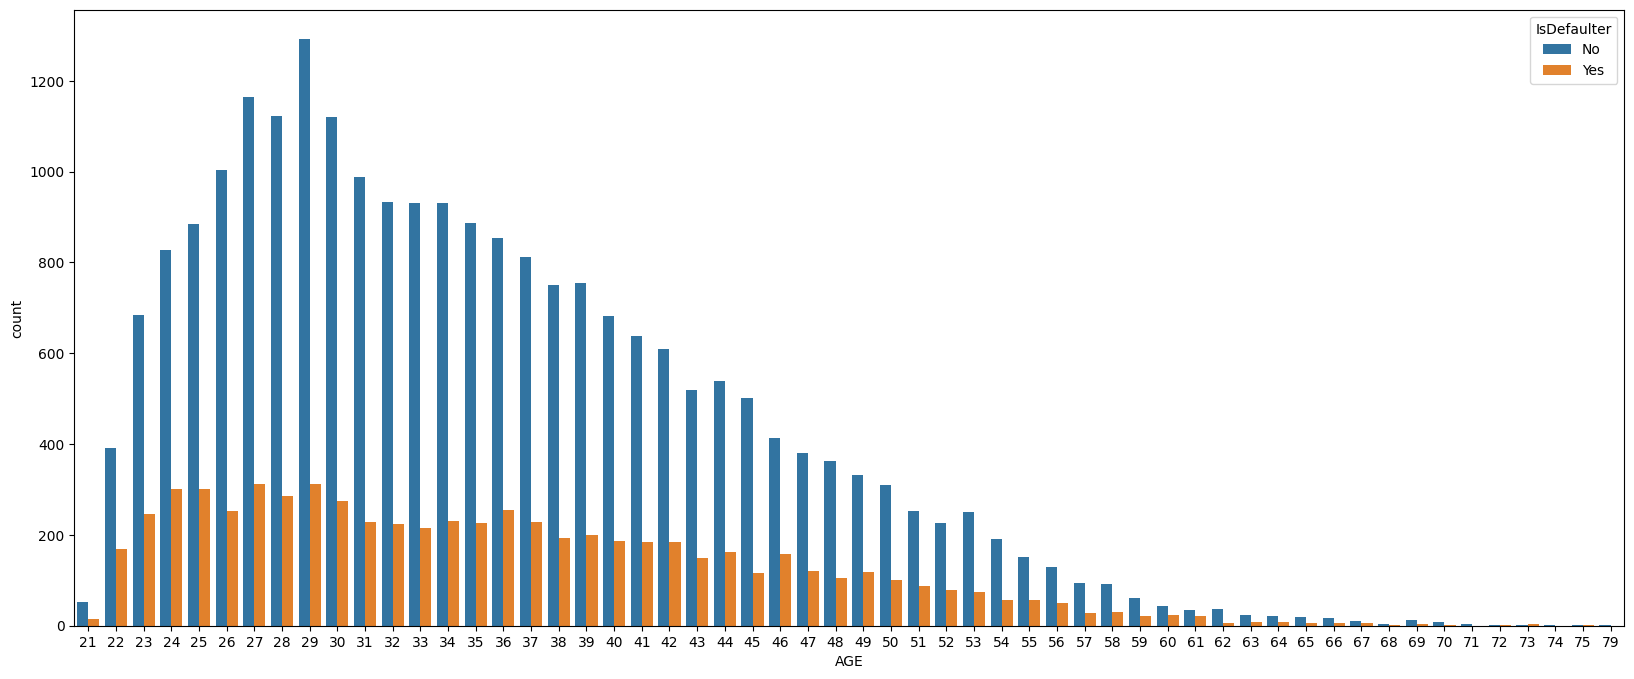

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = data_df)

# New section

In [ ]:
#Below are few observations for categorical features:

#There are more females credit card holder,so no. of defaulter have high proportion of females.
#No. of defaulters have a higher proportion of educated people (graduate school and university)
#No. of defaulters have a higher proportion of Singles.

In [ ]:
#Checking Correlation

In [ ]:
data_df = pd.DataFrame(data_df, columns=["ID", "LIMIT_BAL","SEX","EDUCATION","MARRIAGE", "AGE","PAY_SEPT","PAY_AUG","PAY_JUL","PAY_JUN","PAY_MAY","PAY_APR","BILL_AMT_SEPT","BILL_AMT_AUG","BILL_AMT_JUL","BILL_AMT_JUN","BILL_AMT_MAY","BILL_AMT_APR","PAY_AMT_SEPT","PAY_AMT_AUG","PAY_AMT_JUL","PAY_AMT_JUN","PAY_AMT_MAY","PAY_AMT_APR","IsDefaulter"])

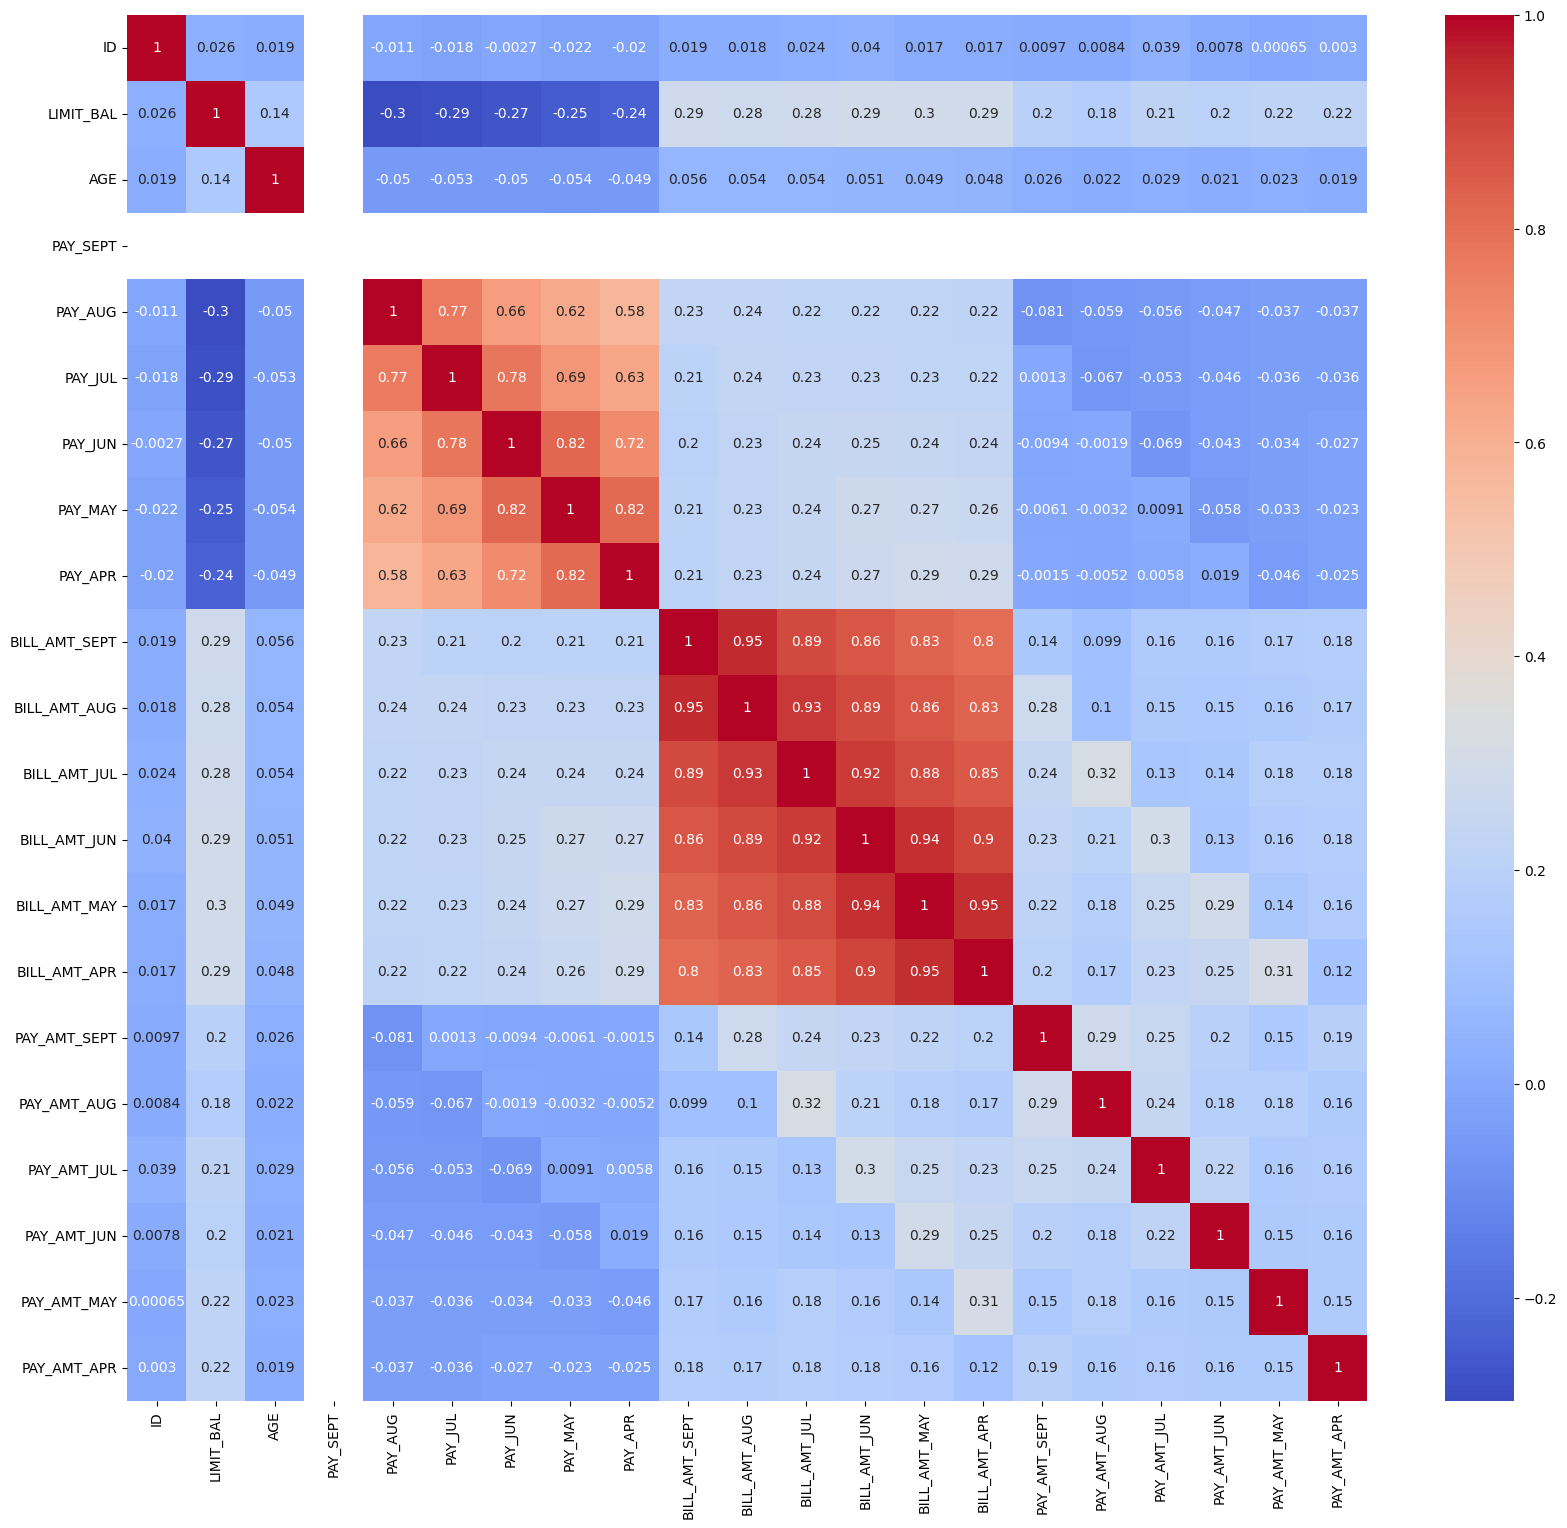

In [ ]:
numeric_data = data_df.select_dtypes(include=np.number)
plt.figure(figsize=(20,18))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
data_df.shape

(30000, 25)

#One Hot Encoding

In [ ]:

#Label encoding
encode_num = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1,"No":0}}
data_df=data_df.replace(encode_num)

In [ ]:
#check for changed labels
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,0,University,Married,24,NaN,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,NaN,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,NaN,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,NaN,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,NaN,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#check for changed labels
data_df.head()
data_df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_df.shape

(30000, 25)

In [ ]:
#creating dummy variables
data_df = pd.get_dummies(data_df, columns=['EDUCATION','MARRIAGE'])

In [ ]:
data_df.shape

(30000, 30)

In [ ]:
data_df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [ ]:
#creating dummy variables by droping first variable
data_df = pd.get_dummies(data_df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [ ]:
data_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

In [ ]:

data_df.shape

(30000, 70)

In [ ]:
#checking all variables
data_df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,False,True,False,False,False,False,False,False,False
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,False,True,False,False,False,False,False,False,False
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,False,True,False,False,False,False,False,False,False


#Handling Class Imbalance
#As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

#SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
!pip install  scikit-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from imblearn.over_sampling import SMOTE
data_df = data_df.dropna(subset=['IsDefaulter'])

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data_df[(i for i in list(data_df.describe(include='all').columns) if i != 'IsDefaulter')], data_df['IsDefaulter'])

print('Original unbalanced dataset shape', len(data_df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [ ]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(data_df.describe(include='all').columns) if i != 'IsDefaulter'))

<Axes: xlabel='IsDefaulter', ylabel='count'>

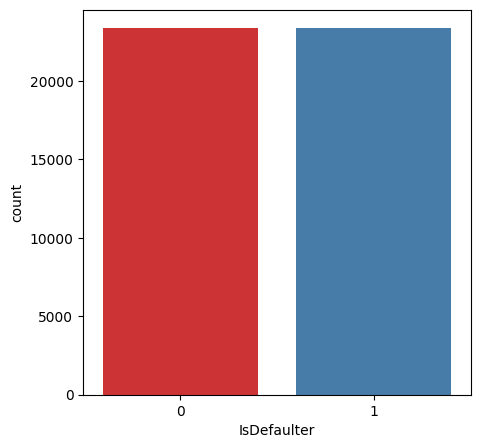

In [ ]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(data_df.describe(include='all').columns) if i != 'IsDefaulter'))
# Add the 'IsDefaulter' column to the balanced_df DataFrame
balanced_df['IsDefaulter'] = y_smote
#checking for class imbalance
plt.figure(figsize=(5,5))
sns.countplot(x='IsDefaulter', data = balanced_df, palette = "Set1" )

In [ ]:

#shape of balanced dataframe
balanced_df.shape

(46728, 70)

In [ ]:

#removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [ ]:

#final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,True,False,False,False,False,False,False,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,0


In [ ]:

#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [ ]:

X.shape

(46728, 68)

In [ ]:
y.shape

(46728,)

#Data Transformation

In [ ]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Train Test Splitting

In [ ]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [ ]:
X_train.shape

(37382, 68)

In [ ]:
X_test.shape

(9346, 68)

#**Model** **Implementation**


**Random Forest Classiffication**

In [ ]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.857
The precision on test data is  0.812
The recall on test data is  0.894
The f1 on test data is  0.851
The roc_score on test data is  0.861


[[4221  452]
 [ 880 3793]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

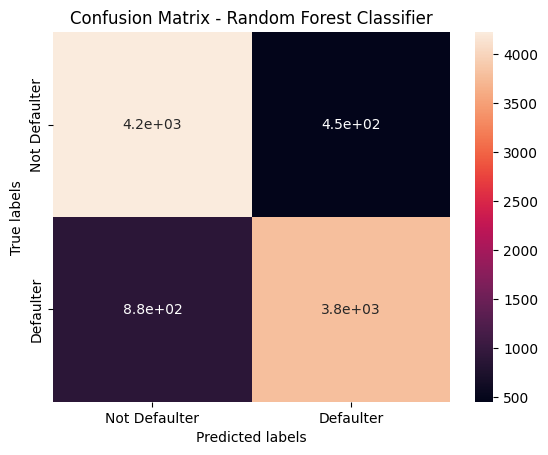

In [ ]:
# Get the confusion matrix for Random Forest Classifier
from sklearn.metrics import confusion_matrix
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Gradient Boosting**

In [ ]:

#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)


In [ ]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.831
The accuracy on test data is  0.83
The precision on test data is  0.773
The recall on test data is  0.873
The f1 on test data is  0.82
The roc_score on test data is  0.834


[[4146  527]
 [1061 3612]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

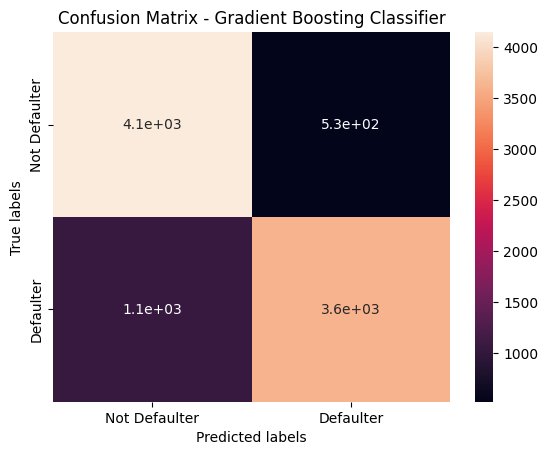

In [ ]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**XG Boosting**

In [ ]:
!pip install xgboost==1.5.2 scikit-learn==1.3.0


In [ ]:
!pip install --upgrade xgboost scikit-learn #Upgrading to the latest

  Using cached xgboost-2.1.4-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.2
    Uninstalling xgboost-1.5.2:
      Successfully uninstalled xgboost-1.5.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [ ]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming 'X' and 'y' are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Split data

#fitting data into XG Boosting Classifier
xgb_model = xgb.XGBClassifier() # Use xgb.XGBClassifier() and rename to avoid overwriting
xgb_model.fit(x_train,y_train) # Fit using x_train and y_train

[08:41:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
#fitting data into XG Boosting Classifier
xgb = xgb.XGBClassifier() # Use xgb.XGBClassifier()
xgb.fit(x_train,y_train)

[08:41:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[08:42:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [ ]:

#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.903
The accuracy on test data is  0.843
The precision on test data is  0.789
The recall on test data is  0.884
The f1 on test data is  0.834
The roc_score on test data is  0.847


[[4189  484]
 [ 984 3689]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

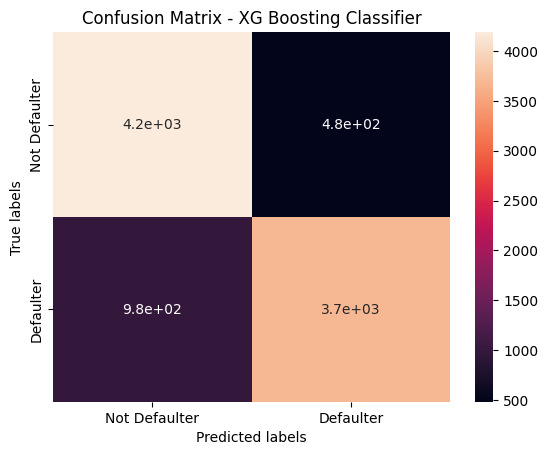

In [ ]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)



**AdaBoost**

In [ ]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#fitting data into AdaBoost Classifier
adb = AdaBoostClassifier(random_state=42) # Changed gbc to adb
adb.fit(X_train, y_train)
#class prediction of y
y_pred_=adb.predict(X_test) # Changed gbc to adb
y_train_pred_adb=adb.predict(X_train) # Changed gbc to adb

In [ ]:

#getting all scores for AdaBoost Classifier
train_accuracy_adb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_adb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_adb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_adb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_adb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_adb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_adb)
print("The accuracy on test data is ", accuracy_adb)
print("The precision on test data is ", precision_score_adb)
print("The recall on test data is ", recall_score_adb)
print("The f1 on test data is ", f1_score_adb)
print("The roc_score on test data is ", roc_score_adb)

The accuracy on train data is  0.903
The accuracy on test data is  0.843
The precision on test data is  0.789
The recall on test data is  0.884
The f1 on test data is  0.834
The roc_score on test data is  0.847


[[4054  619]
 [1056 3617]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

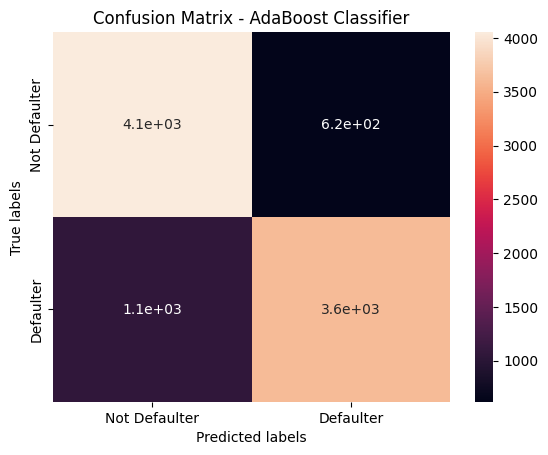

In [ ]:
# Get the confusion matrix for AdaBoost Classifier
labels = ['Not Defaulter', 'Defaulter']
y_pred_adb = adb.predict(X_test)  # Predict using the AdaBoost model (adb) and assign to y_pred_adb
cm_adb = confusion_matrix(y_test, y_pred_adb)  # Use the assigned predictions for confusion matrix
print(cm_adb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_adb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - AdaBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


**Baseline Model Comparision**

In [ ]:
all_lassifiers = [ 'Random Forest',  'Gradient Boosting', 'XG Boosting','AdaBoost']
all_train_accuracy = [ train_accuracy_rfc, train_accuracy_gbc, train_accuracy_xgb,train_accuracy_adb]
all_test_accuracy = [ accuracy_rfc, accuracy_gbc, accuracy_xgb,accuracy_adb]
all_precision_score = [ precision_score_rfc, precision_score_gbc, precision_score_xgb,precision_score_adb]
all_recall_score = [ recall_score_rfc, recall_score_gbc, recall_score_xgb,recall_score_adb]
all_f1_score = [ f1_score_rfc, f1_score_gbc, f1_score_xgb,f1_score_adb]
all_auc_score = [ roc_score_rfc, roc_score_gbc, roc_score_xgb, roc_score_adb]


In [ ]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [ ]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.999,0.857,0.812,0.894,0.851,0.861
1,Gradient Boosting,0.831,0.830,0.773,0.873,0.820,0.834
2,XG Boosting,0.903,0.843,0.789,0.884,0.834,0.847
3,AdaBoost,0.903,0.843,0.789,0.884,0.834,0.847


In [ ]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.999,0.857,0.812,0.894,0.851,0.861
2,XG Boosting,0.903,0.843,0.789,0.884,0.834,0.847
3,AdaBoost,0.903,0.843,0.789,0.884,0.834,0.847
1,Gradient Boosting,0.831,0.830,0.773,0.873,0.820,0.834


In [ ]:
compare_df.sort_values(by=['Train Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.999,0.857,0.812,0.894,0.851,0.861
2,XG Boosting,0.903,0.843,0.789,0.884,0.834,0.847
3,AdaBoost,0.903,0.843,0.789,0.884,0.834,0.847
1,Gradient Boosting,0.831,0.830,0.773,0.873,0.820,0.834



**Combined ROC curve for all the models**

In [ ]:
#importing roc curve
from sklearn.metrics import roc_curve

In [ ]:
#probability prediction of y for all model
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]
y_pred_proba_adb = adb.predict_proba(X_test)[:,1]

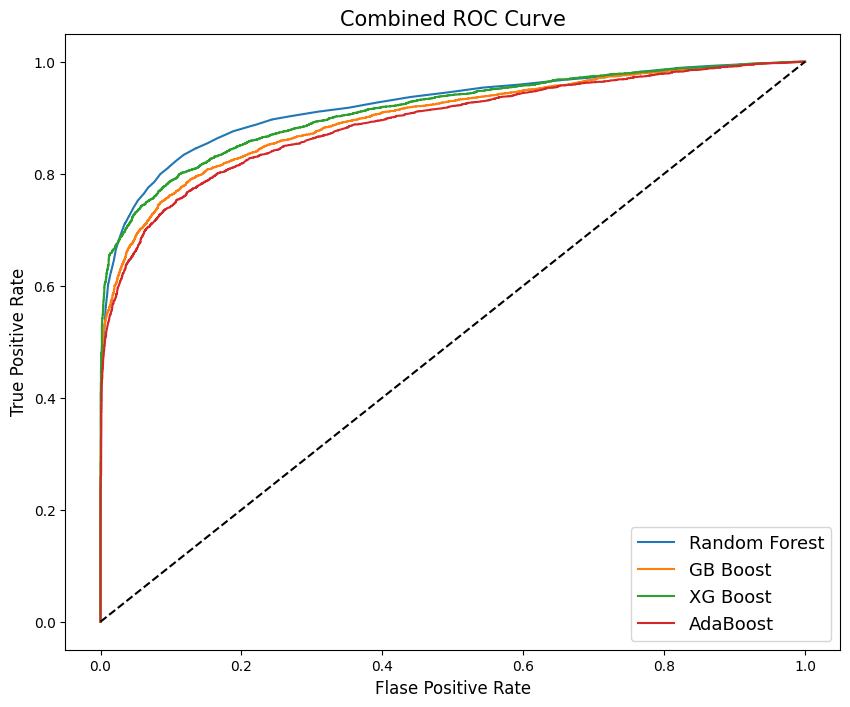

In [ ]:
fig = plt.figure(figsize=(10,8))

fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)
fpr_adb, tpr_adb, _adb = roc_curve(y_test,  y_pred_proba_adb)

plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)
plt.plot(fpr_adb, tpr_adb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Random Forest", "GB Boost", "XG Boost","AdaBoost"], prop={'size':13}, loc='lower right' )